In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
diab = pd.read_csv('/data_sets/diabetes.csv')
diab.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Observation:** We can see that values in BloodPressure, SkinThickness, Insulin are 0, which is not possible in the real world.

In [3]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
summary_stats = diab.describe().round(2).T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


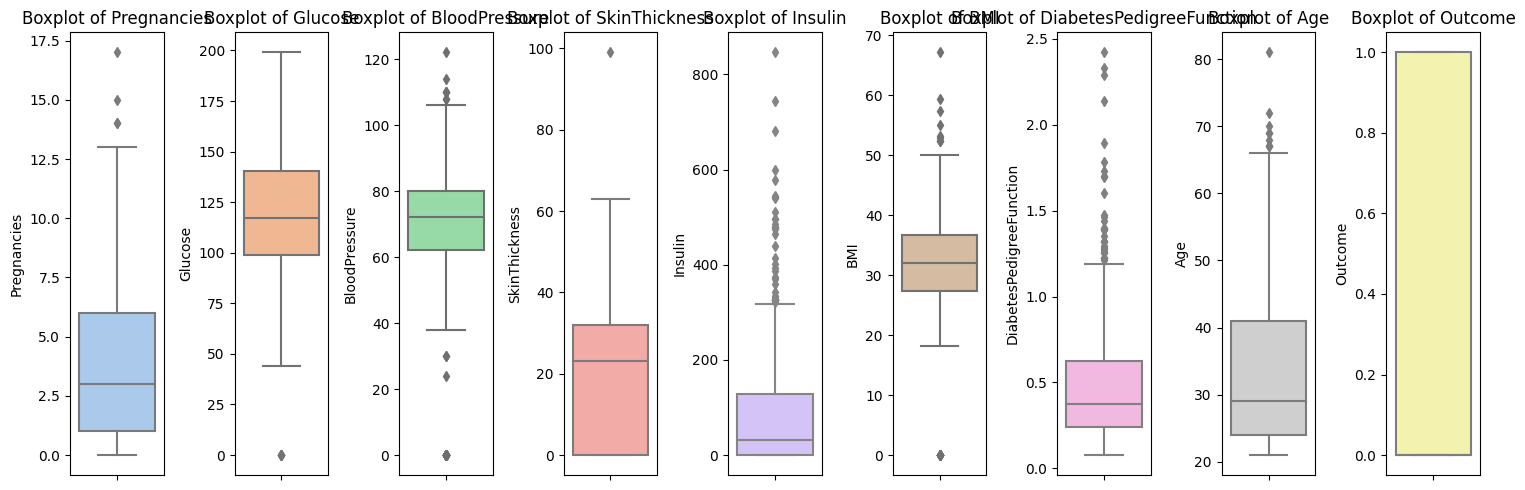

In [5]:
# Calculate the inter-quartile range (IQR) of numerical columns
numeric_columns = diab.columns 

fig, axes = plt.subplots(nrows = 1, ncols = len(numeric_columns),
                         figsize = (15, 5))

boxplot_colors = sns.color_palette('pastel')

# Plot horizontal box plots for each numerical column
for i, col in enumerate(numeric_columns):
    sns.boxplot(y = diab[col], ax = axes[i], color=boxplot_colors[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

 We can see the presence of outliers most of the features.

In [6]:
diab['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

We have two oucomes, 0 and 1. 0 refers to 'No Diabetes' and 1 refers to 'Diabetes'.
There is a bias in the dataset on non-diabetic patients

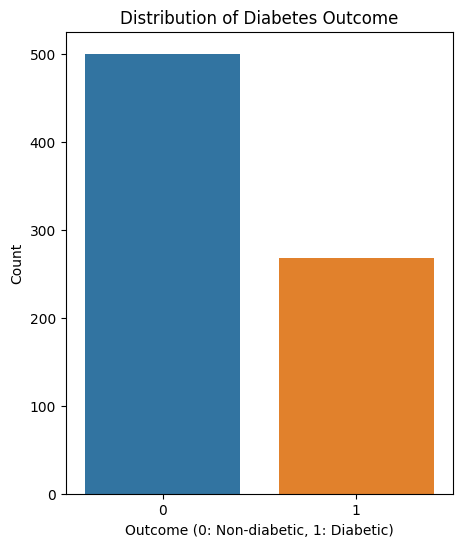

In [7]:
plt.figure(figsize=(5,6))
sns.countplot(x = 'Outcome', data = diab)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

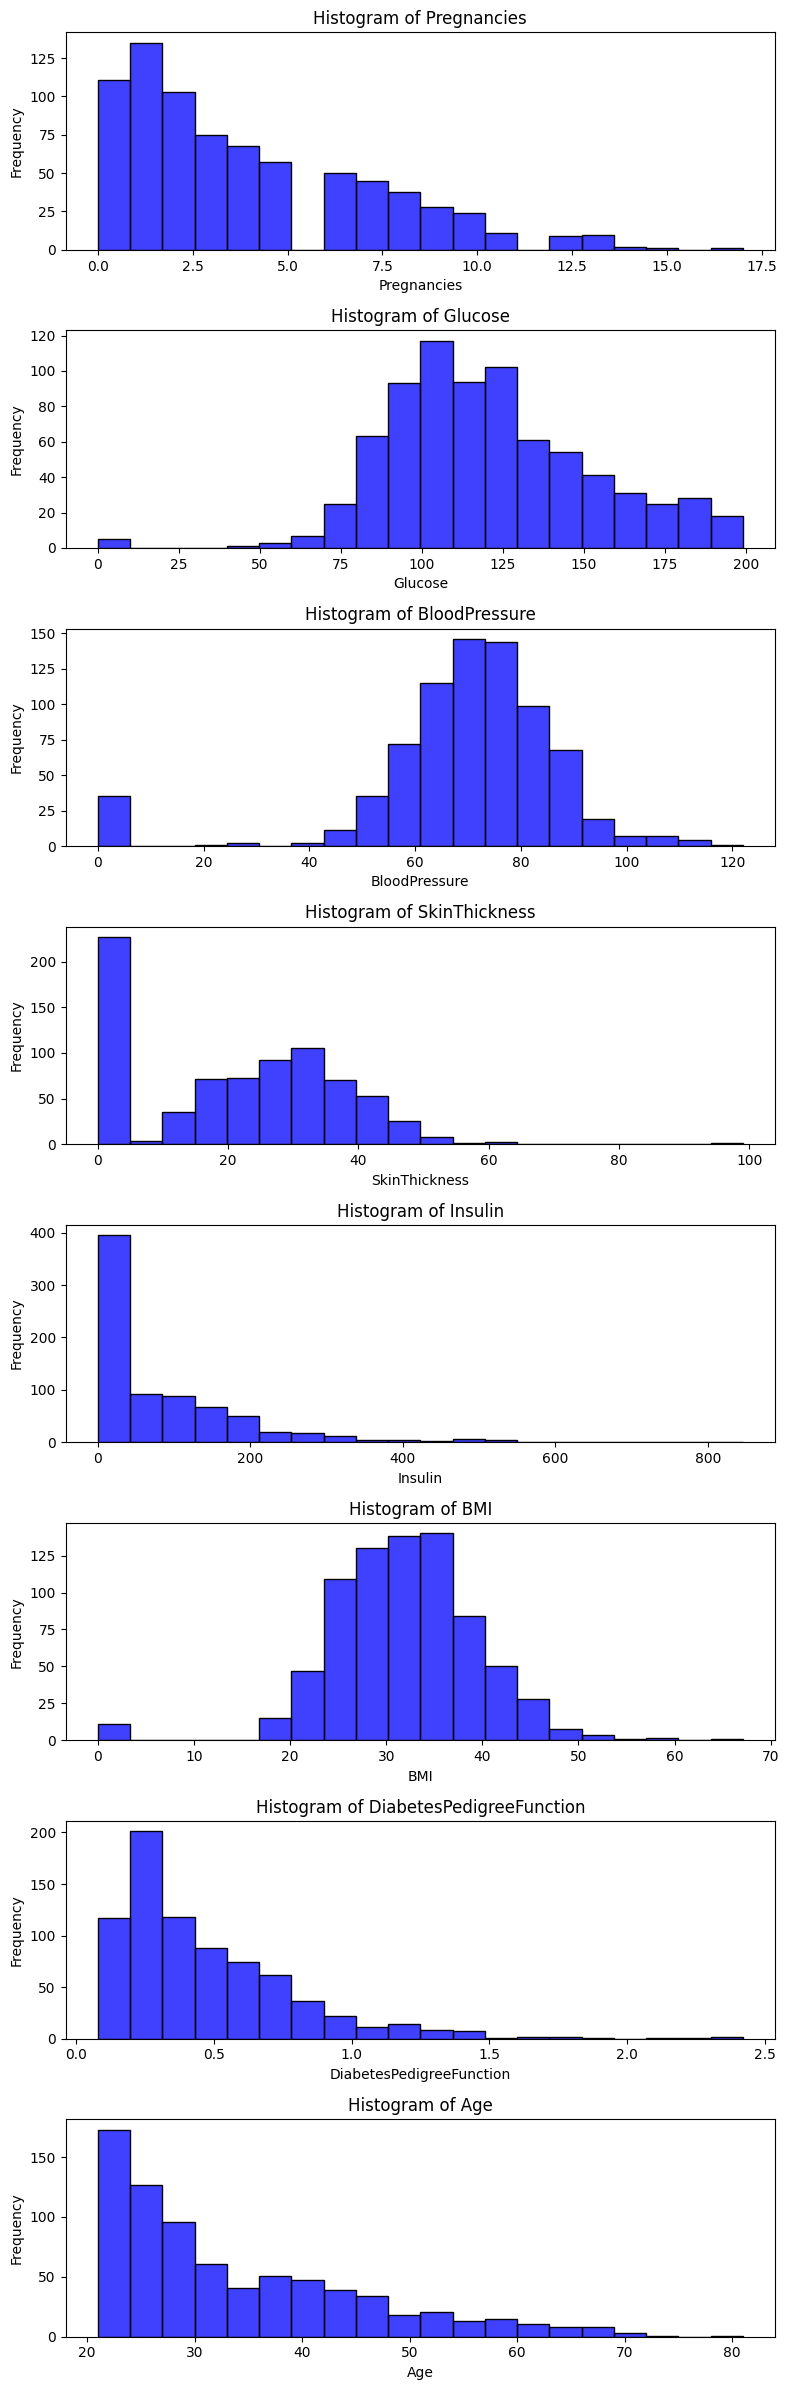

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your diabetes dataset

# Selecting all features except 'Outcome'
features = diab.drop('Outcome', axis=1)

# Setting up subplots in a grid layout with a smaller figure size
fig, axes = plt.subplots(nrows=len(features.columns), ncols=1, figsize=(8, 3 * len(features.columns)))

# Plot histplot for each feature
for ax, feature in zip(axes,features.columns):
    sns.histplot(diab[feature], kde=False, bins=20, color='blue', ax=ax)
    ax.set_title(f'Histogram of {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()


**Observation:** Some features in the dataset have some incorrect values

C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


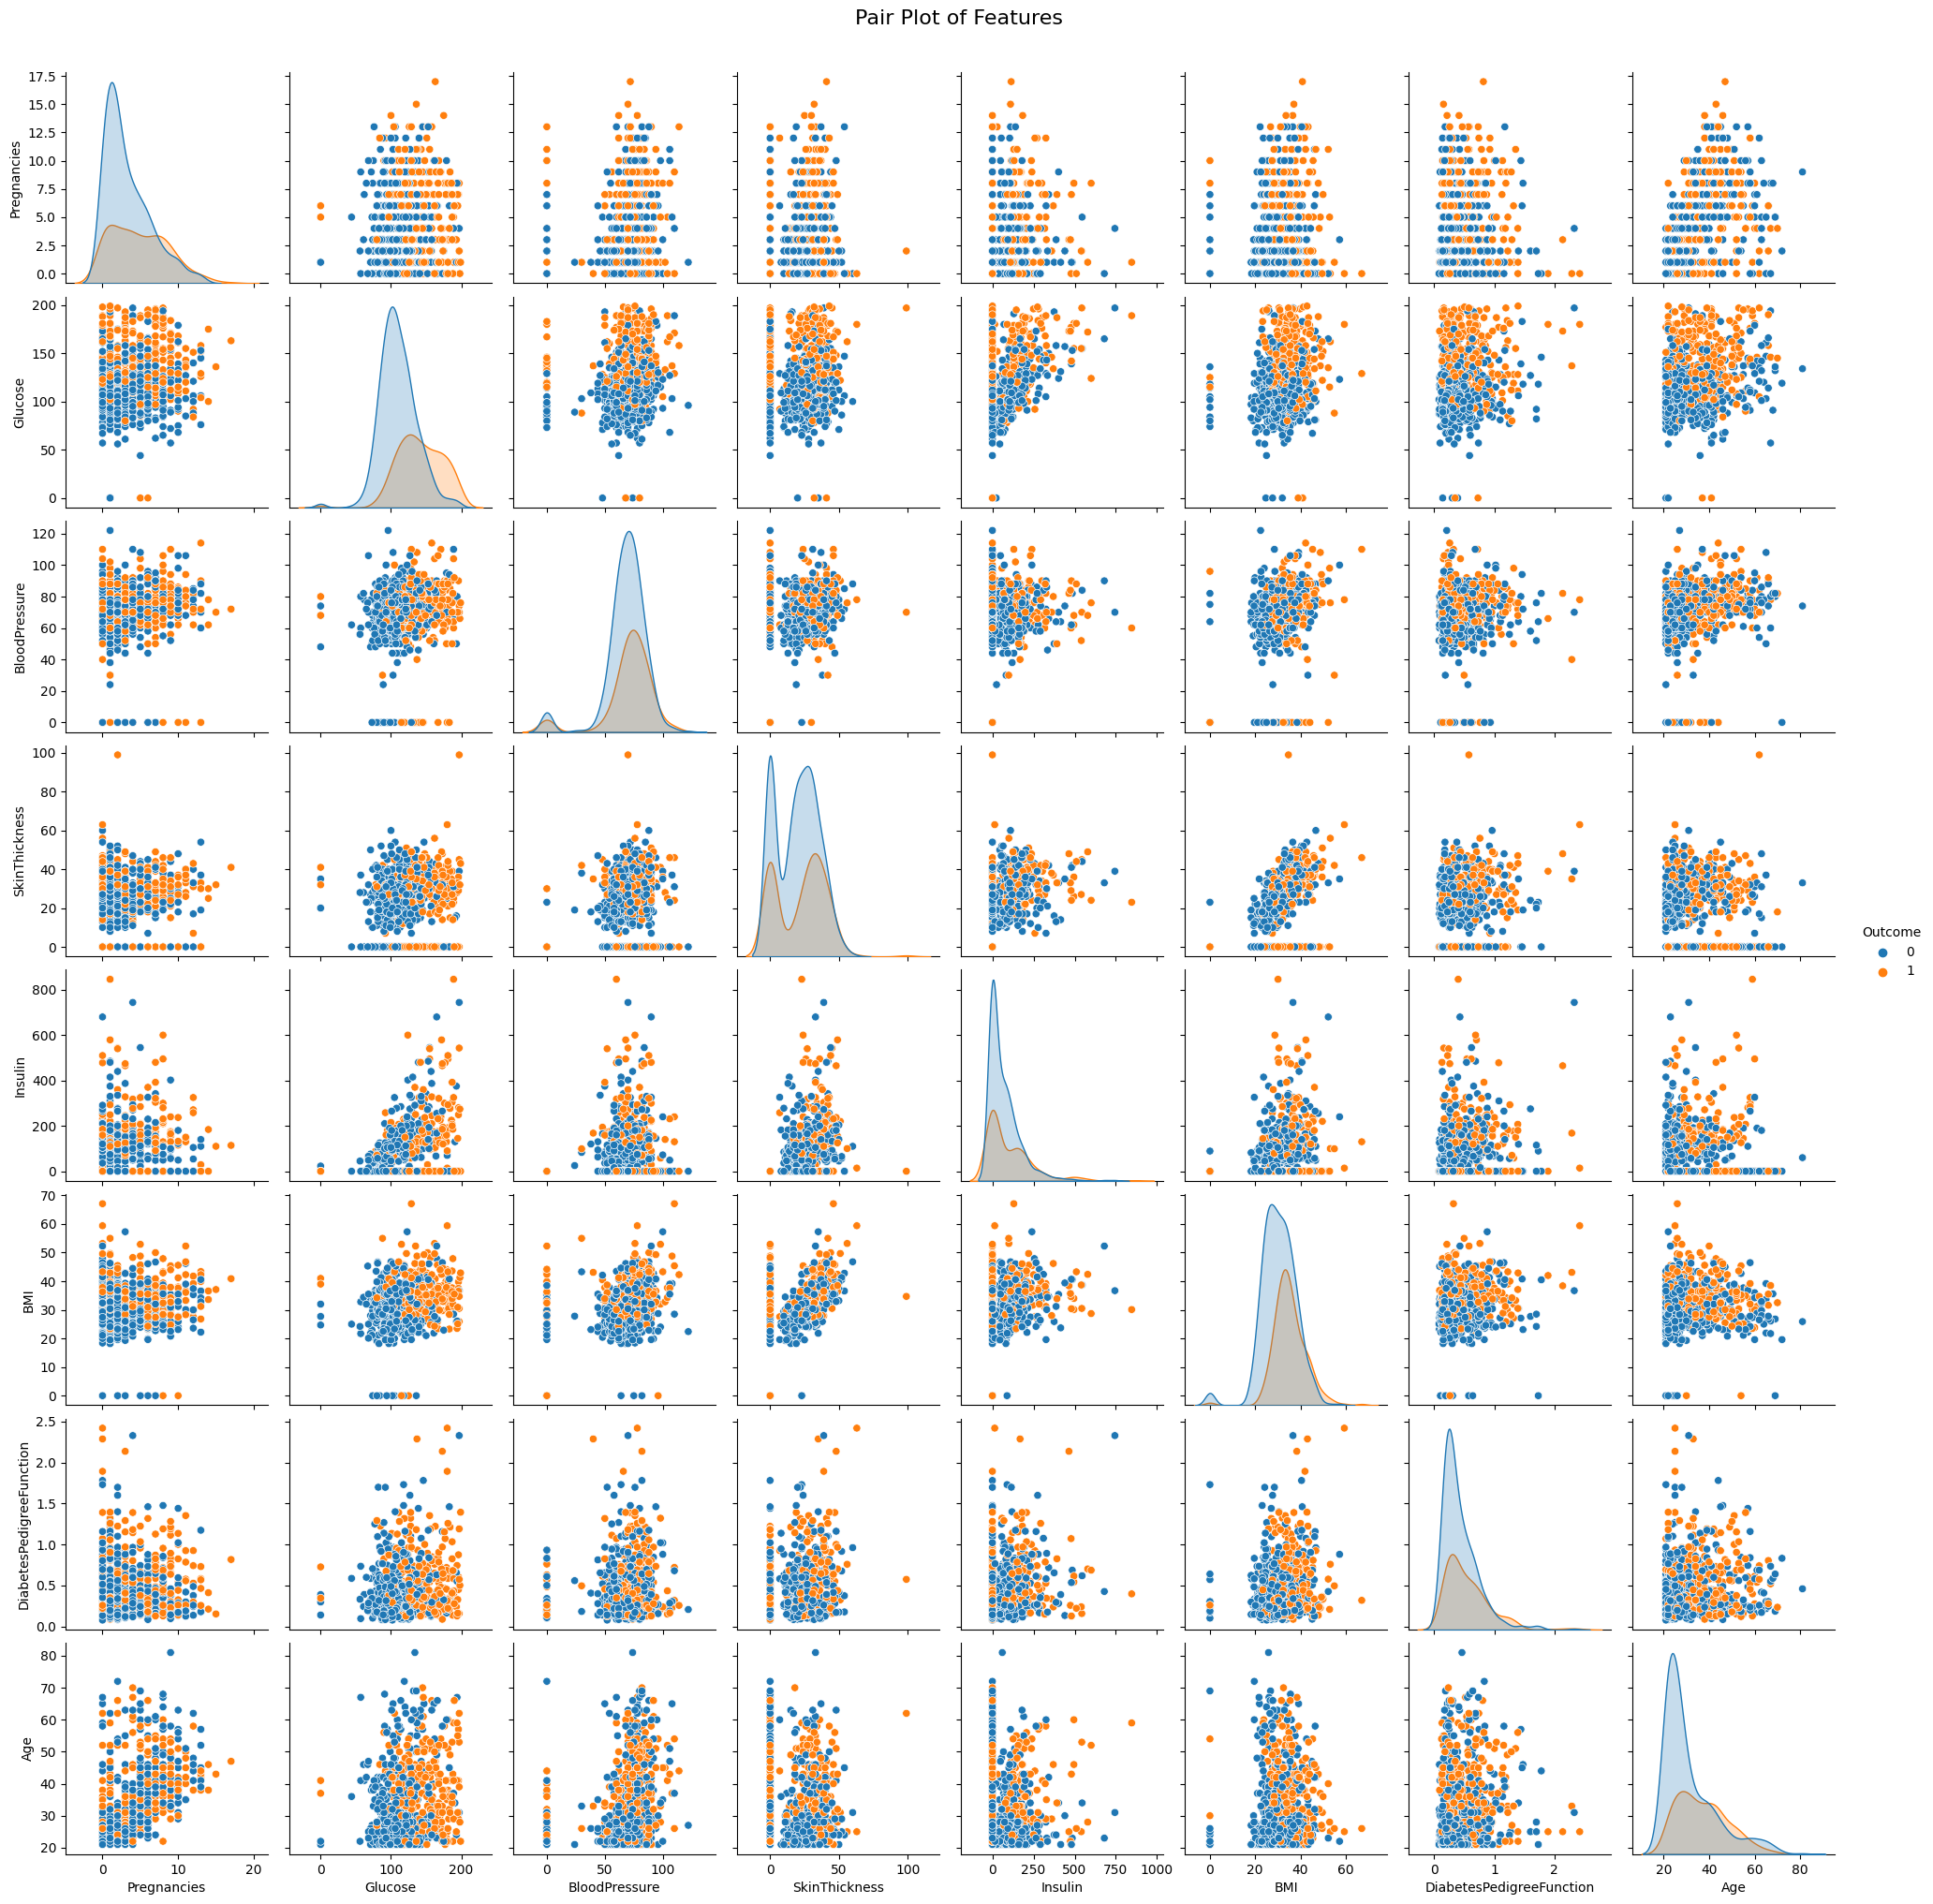

In [9]:
sns.pairplot(diab, hue='Outcome', diag_kind = 'kde')
plt.suptitle('Pair Plot of Features', y=1.02, fontsize=16)
plt.show()

In [10]:
# Handling meaningless values
# we will replace all the zeroes with the median of each featiure

diab.replace(0, diab.median(), inplace = True)

In [11]:
# check for missing values
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# plot correlations between features
correlation_matrix = diab.corr()
correlation_matrix 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


**Observation:** There is correlation between features, although some features have values greater than 0.5. 

To achieve more balanced dataset, we use upsampling method which  increase the number of instances in the minority class (1 - Diabetic patient). Here, We will use ADASYN (Adaptive
Synthetic Sampling).

In [13]:
from imblearn.over_sampling import ADASYN

In [14]:
# Let's split our dataset
X = diab.drop('Outcome', axis = 1)
y = diab['Outcome']

# Instantiate ADASYN
adasyn = ADASYN(random_state = 42)

# fit and transform the data
X_resampled, y_resampled = adasyn.fit_resample(X,y)

In [15]:
# Create a new DataFrame with the resamples data
diab_resampled = pd.DataFrame(X_resampled, columns=X.columns)
diab_resampled['Outcome'] = y_resampled

In [16]:
# Display the class distribution before and after resampling
print("Class distribution before resampling:")
print(y.value_counts())

Class distribution before resampling:
Outcome
0    500
1    268
Name: count, dtype: int64


In [17]:
print("\nClass distribution after resampling:")
print(y_resampled.value_counts())


Class distribution after resampling:
Outcome
0    500
1    467
Name: count, dtype: int64


We've created an unbiased version of the dataset using ADASYN, We can see the difference in the resampled for as compared to the former.

In [18]:
# We'll use to resampled format to process the data
diab_resampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


In [19]:
# Assuming diab_resampled is your resampled diabetes dataset
X_resampled = diab_resampled.drop('Outcome', axis=1)
y_resampled = diab_resampled['Outcome']

# scale the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

# Fit and transform the data
X_resampled_scaled = std_scaler.fit_transform(X_resampled)

# Create a new dataFrame with the scaled features
diab_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=X_resampled.columns)
diab_resampled_scaled['Outcome'] = y_resampled

# Display the first few rows of the scaled DataFrame
print("\nThis is the Resampled and Scaled DataFrame:")
diab_resampled_scaled.head()


This is the Resampled and Scaled DataFrame:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.549789,0.857564,-0.067052,0.820653,-0.623862,0.108355,0.452041,1.438123,1
1,-1.141196,-1.290789,-0.576262,0.146802,-0.623862,-0.950978,-0.414137,-0.233244,0
2,1.226183,2.051092,-0.745999,-0.527048,-0.623862,-1.450378,0.593265,-0.145277,1
3,-1.141196,-1.154385,-0.576262,-0.527048,-0.033753,-0.723978,-0.991589,-1.112910,0
4,-0.464802,0.482454,-2.782839,0.820653,0.653934,1.546021,5.664798,-0.057310,1


In [20]:
# Splitting the data in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled,
                                                   test_size=0.3, random_state=0)

In [21]:
# Before initializing KNeighborsClassifier to the dataset, 
# we'll use gridsearch to get the best k value
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import  KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [23]:
# Display the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'n_neighbors': 11}
Best Accuracy: 0.730806100217865


We have the best parameter to be 11 with accuracy of 73%. Now, let's use this k parameter to evaluate the performance of the model. 

In [24]:
best_knn_model = grid_search.best_estimator_

# Evaluate model on test set
accuracy = best_knn_model.score(X_test, y_test)

In [25]:
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.7628865979381443
